# 🏠 Analyse des Données Immobilières - Maroc

## Objectif
Analyser les données d'appartements au Maroc pour développer un modèle prédictif de prix.

## Plan d'analyse
1. **Chargement des données** - Import et exploration initiale
2. **Analyse exploratoire** - Compréhension des variables
3. **Prétraitement** - Nettoyage et transformation
4. **Modélisation** - Test de différents algorithmes
5. **Évaluation** - Comparaison des performances
6. **Conclusions** - Insights et recommandations

---

## 1. Chargement des Données

### Remarques importantes :
- **Source** : Fichier CSV contenant les données d'appartements au Maroc
- **Objectif** : Charger et examiner la structure des données
- **Étapes** : Import pandas → Lecture CSV → Vérification structure (info, head)

### 1.1 Import des bibliothèques

In [1271]:
import pandas as pd
import numpy as np

### 1.2 Lecture du fichier CSV
**Remarque** : Le fichier se trouve dans le dossier `data/`

In [1272]:
# Chargement des données depuis le fichier CSV
df = pd.read_csv('../data/appartements-data-db.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1772 non-null   object 
 1   price         1490 non-null   object 
 2   city_name     1772 non-null   object 
 3   salon         1620 non-null   float64
 4   nb_rooms      1490 non-null   float64
 5   nb_baths      1480 non-null   float64
 6   surface_area  1742 non-null   float64
 7   equipment     1402 non-null   object 
 8   link          1773 non-null   object 
dtypes: float64(4), object(5)
memory usage: 124.8+ KB


,title,price,city_name,salon,nb_rooms,nb_baths,surface_area,equipment,link
0,CMN-MA-1752 - Appartement à vendre à Palmier,2 000 000 DH,Casablanca,NaN,2.0,2.0,168.0,Ascenseur/Balcon/Parking/Terrasse,https://www.avito.ma/fr/palmier/appartements/C...
1,66370-Vente Appt à Casablanca Hay Hassani de 1...,1 195 000 DH,Casablanca,NaN,2.0,2.0,98.0,Ascenseur/Balcon/Chauffage/Climatisation/Cuisi...,https://www.avito.ma/fr/hay_hassani/appartemen...
2,Appartement à vendre 81 m² à Dar Bouazza,1 350 000 DH,Dar Bouazza,1.0,2.0,2.0,81.0,Ascenseur/Balcon/Chauffage/Climatisation/Conci...,https://www.avito.ma/fr/dar_bouazza/appartemen...
3,63860-Vente Appt à Casablanca Quartier Bd Med ...,900 000 DH,Casablanca,NaN,1.0,1.0,56.0,Ascenseur/Chauffage/Climatisation/Cuisine Équi...,https://www.avito.ma/fr/centre_ville/apparteme...
4,Appartement à Rabat Agdal,3 100 000 DH,Rabat,2.0,3.0,2.0,200.0,Ascenseur/Balcon/Concierge/Parking/Sécurité,https://www.avito.ma/fr/agdal/appartements/App...


## 2. Analyse exploratoire des données (EDA)
Dans cette section, nous allons explorer la structure générale du jeu de données, identifier les valeurs manquantes et les doublons, analyser la distribution des variables numériques et étudier les relations entre variables.

In [1273]:
# Dimensions et types de données
print('Shape:', df.shape)
print('Types:', df.dtypes)
df.head()

Shape: (1773, 9)
Types: title            object
price            object
city_name        object
salon           float64
nb_rooms        float64
nb_baths        float64
surface_area    float64
equipment        object
link             object
dtype: object


,title,price,city_name,salon,nb_rooms,nb_baths,surface_area,equipment,link
0,CMN-MA-1752 - Appartement à vendre à Palmier,2 000 000 DH,Casablanca,NaN,2.0,2.0,168.0,Ascenseur/Balcon/Parking/Terrasse,https://www.avito.ma/fr/palmier/appartements/C...
1,66370-Vente Appt à Casablanca Hay Hassani de 1...,1 195 000 DH,Casablanca,NaN,2.0,2.0,98.0,Ascenseur/Balcon/Chauffage/Climatisation/Cuisi...,https://www.avito.ma/fr/hay_hassani/appartemen...
2,Appartement à vendre 81 m² à Dar Bouazza,1 350 000 DH,Dar Bouazza,1.0,2.0,2.0,81.0,Ascenseur/Balcon/Chauffage/Climatisation/Conci...,https://www.avito.ma/fr/dar_bouazza/appartemen...
3,63860-Vente Appt à Casablanca Quartier Bd Med ...,900 000 DH,Casablanca,NaN,1.0,1.0,56.0,Ascenseur/Chauffage/Climatisation/Cuisine Équi...,https://www.avito.ma/fr/centre_ville/apparteme...
4,Appartement à Rabat Agdal,3 100 000 DH,Rabat,2.0,3.0,2.0,200.0,Ascenseur/Balcon/Concierge/Parking/Sécurité,https://www.avito.ma/fr/agdal/appartements/App...


In [1274]:
# Valeurs manquantes et doublons
print('Valeurs manquantes par colonne:')
print(df.isnull().sum())
print('Nombre de doublons:', df.duplicated().sum())

Valeurs manquantes par colonne:
title             1
price           283
city_name         1
salon           153
nb_rooms        283
nb_baths        293
surface_area     31
equipment       371
link              0
dtype: int64
Nombre de doublons: 41


In [1275]:
# Suppression des doublons
df = df.drop_duplicates()
print('Doublons supprimés. Nouvelle forme:', df.shape)

Doublons supprimés. Nouvelle forme: (1732, 9)


             salon     nb_rooms     nb_baths   surface_area
count  1579.000000  1454.000000  1444.000000    1701.000000
mean      1.263458     2.381706     2.263850     176.827160
std       0.555193     0.668407     7.424766    3005.066251
min       0.000000     1.000000     0.000000       1.000000
25%       1.000000     2.000000     1.000000      71.000000
50%       1.000000     2.000000     2.000000      88.000000
75%       1.000000     3.000000     2.000000     114.000000
max       8.000000     7.000000   134.000000  123456.000000


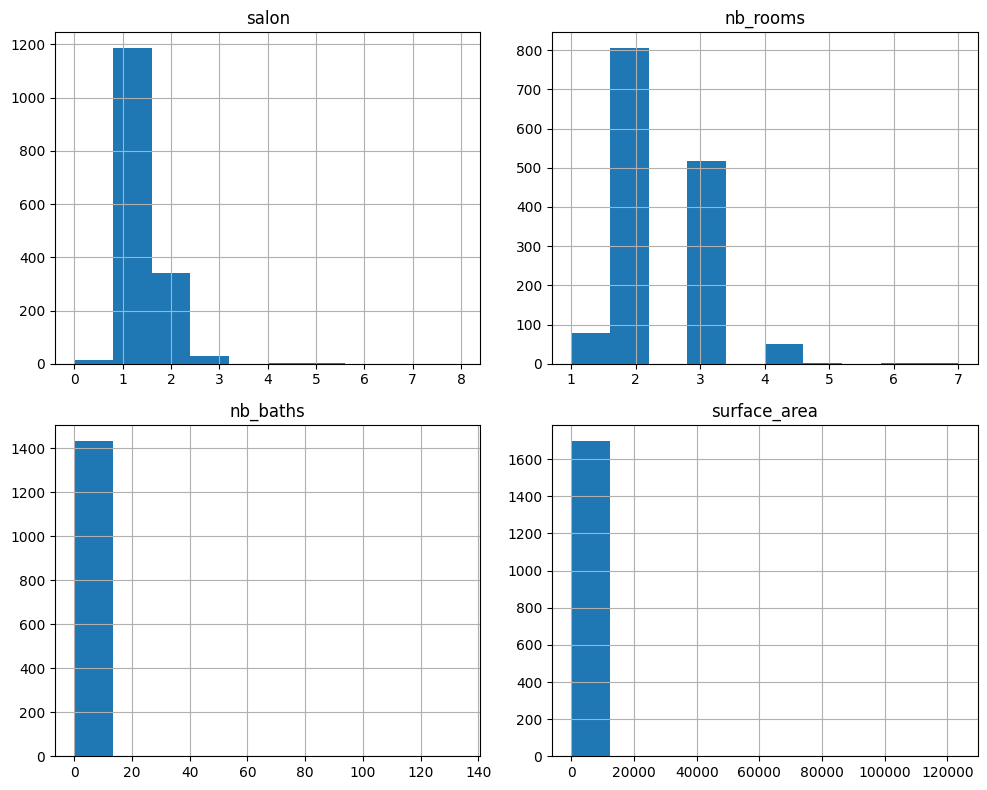

In [1276]:
# Statistiques descriptives et histogrammes des variables numériques
print(df.describe())
import matplotlib.pyplot as plt
df.select_dtypes(include=np.number).hist(figsize=(10,8))
plt.tight_layout()
plt.show()

                 salon  nb_rooms  nb_baths  surface_area
salon         1.000000  0.301097  0.031103     -0.002133
nb_rooms      0.301097  1.000000  0.053043      0.617838
nb_baths      0.031103  0.053043  1.000000      0.045448
surface_area -0.002133  0.617838  0.045448      1.000000


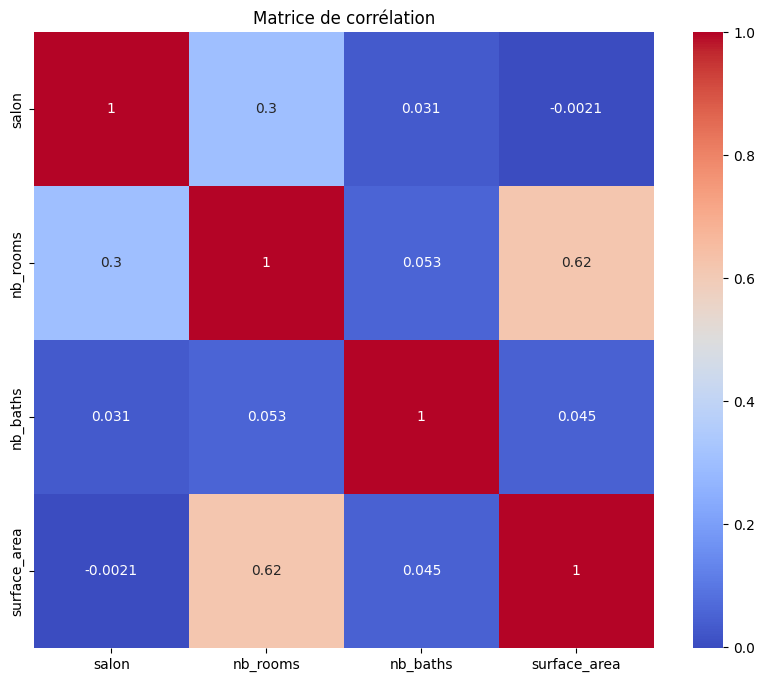

In [1277]:
# Matrice de corrélation et heatmap
corr = df.corr(numeric_only=True)
print(corr)
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

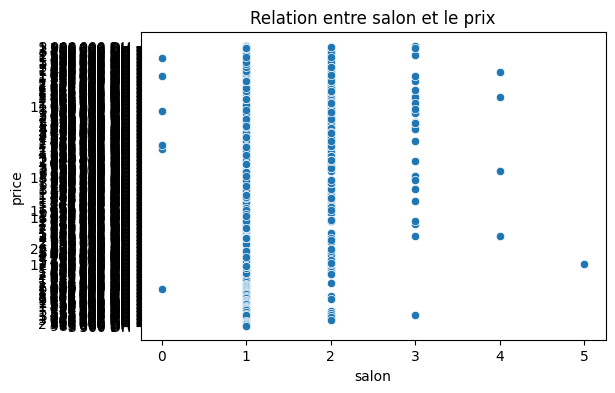

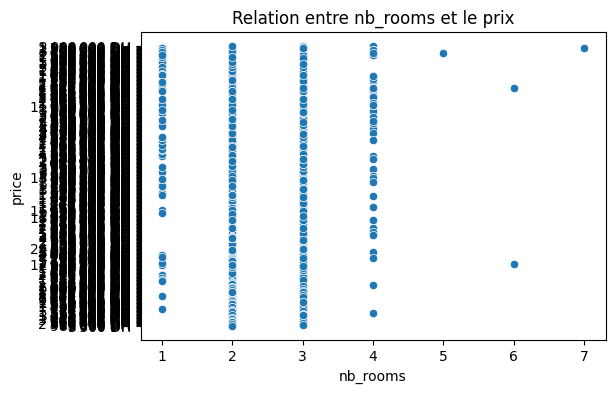

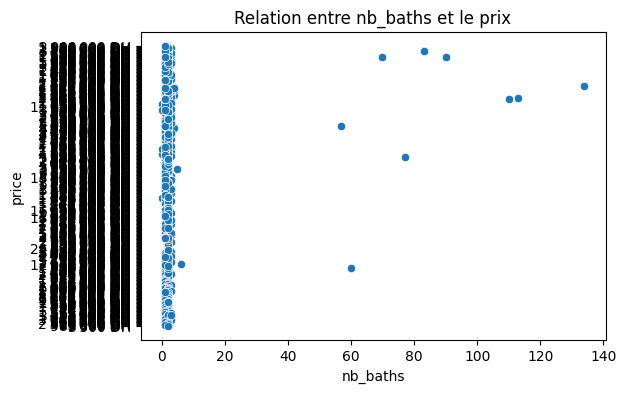

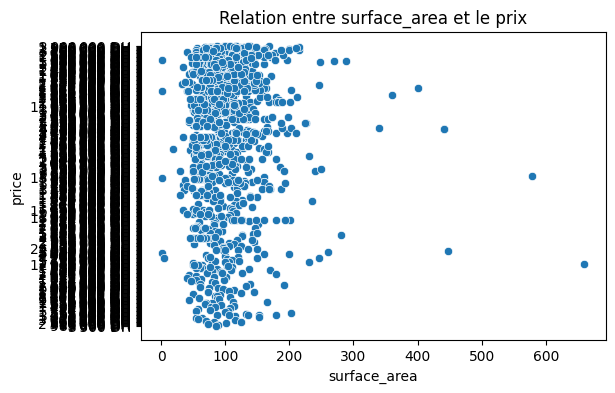

In [1278]:
# Visualisation simple des relations entre chaque variable numérique et le prix
import matplotlib.pyplot as plt
import seaborn as sns
if 'price' in df.columns and not df['price'].isnull().all():
    numeric_cols = [col for col in df.select_dtypes(include=np.number).columns if col != 'price']
    for col in numeric_cols:
        if df[col].isnull().all():
            print(f"Toutes les valeurs de la colonne '{col}' sont manquantes.")
            continue
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col], y=df['price'])
        plt.title(f'Relation entre {col} et le prix')
        plt.xlabel(col)
        plt.ylabel('price')
        plt.show()

In [1279]:
# Extraction des équipements en colonnes booléennes
if 'equipment' in df.columns:
    equipment_dummies = df['equipment'].str.get_dummies(sep='/')
    df = pd.concat([df, equipment_dummies], axis=1)
    print('Colonnes équipements extraites :', equipment_dummies.columns.tolist())

Colonnes équipements extraites : ['Ascenseur', 'Balcon', 'Chauffage', 'Climatisation', 'Concierge', 'Cuisine Équipée', 'Duplex', 'Meublé', 'Parking', 'Sécurité', 'Terrasse']


In [1280]:
# Conversion de la colonne price en float et suppression des colonnes inutiles
print("\n1. Conversion de la colonne 'price' en float et suppression des NaN...")
if 'price' in df.columns:
    df['price'] = df['price'].astype(str).str.replace(r'[^\d.]', '', regex=True)
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    print("Colonne 'price' convertie en float.")



1. Conversion de la colonne 'price' en float et suppression des NaN...
Colonne 'price' convertie en float.


In [1281]:
if 'equipment' in df.columns:
    df = df.drop('equipment', axis=1)
if 'link' in df.columns:
    df = df.drop('link', axis=1)

In [1282]:
# Traitement et uniformisation de la colonne city_name
city_map = {
    "الدار البيضاء": "Casablanca",
    "دار بوعزة": "Dar Bouazza",
    "الرباط": "Rabat",
    "مراكش": "Marrakech",
    "أصيلة": "Asilah",
    "بوسكورة": "Bouskoura",
    "القنيطرة": "Kénitra",
    "المحمدية": "Mohammedia",
    "أكادير": "Agadir",
    "تمارة الجديدة": "Tamesna",
    "سلا": "Salé",
    "حد سوالم": "Had Soualem",
    "تمارة": "Temara",
    "بن سليمان": "Benslimane",
    "طنجة": "Tanger",
    "بوزنيقة": "Bouznika",
    "مكناس": "Meknès",
    "فاس": "Fès",
    "الجديدة": "El Jadida",
    "المنصورية": "El Mansouria",
    "مرتيل": "Martil",
    "الفنيدق": "Fnideq",
    "تطوان": "Tétouan",
    "السعيدية": "Saidia",
    "النواصر": "Nouaceur",
    "تماريس": "Tamaris",
    "كابو نيكرو": "Cabo Negro",
    "سيدي علال البحراوي": "Sidi Allal El Bahraoui",
    "بني ملال": "Béni Mellal",
    "غير معروف": "Unknown",
    "الصويرة": "Essaouira",
    "المهدية": "Mehdia",
    "وجدة": "Oujda",
    "وادي لاو": "Oued Laou",
    "الدشيرة": "Dcheira",
    "سيدي رحال": "Sidi Rahal",
    "دروة": "Deroua",
    "عين عتيق": "Ain Attig",
    "آسفي": "Safi",
    "إنزكان": "Inzegan",
    "إفران": "Ifrane",
    "الداخلة": "Dakhla",
    "الدشيرة الجهادية": "Dcheïra El Jihadia",
    "تغازوت": "Taghazout",
    "سيدي بوكنادل": "Sidi Bouknadel",
    "الصخيرات": "Skhirat",
    "خريبكة": "Khouribga",
    "بركان": "Berkane",
    "مرس الخير": "Mers El Kheir",
    "برشيد": "Berrechid",
    "تيزنيت": "Tiznit",
    "أكادير ملول": "Agadir Melloul",
    "الناظور": "Nador",
    "المنزه": "El Menzeh",
    "بني أنصار": "Bni Ansar",
    "المضيق": "Mdiq",
    "تيط مليل": "Tit Mellil",
    "سوق أربعاء": "Souk El Arbaa",
    "بيوڭرى": "Biougra",
    "سطات": "Settat",
    "عين عودة": "Ain Aouda",
    "تازة": "Taza",
    "الخميسات": "Khemisset",
    "وادي زم": "Oued Zem",
    "صفرو": "Sefrou",
    "مرزوكة": "Merzouga",
    "الحاجب": "El Hajeb",
    "سلوان": "Selouane",
    "تاونات": "Taounate",
    "سيدي بنور": "Sidi Bennour",
    "القصيبة": "El Ksiba"
}
if 'city_name' in df.columns:
    df['city_name'] = df['city_name'].replace(city_map)
    df['city_name'] = df['city_name'].fillna('Unknown')

In [1283]:
# Imputation des valeurs manquantes et suppression des NaN dans 'price'
# Colonnes numériques : médiane
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
# Colonnes catégorielles : 'Unknown'
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')
# Suppression des lignes avec NaN dans 'price' (variable cible)
if 'price' in df.columns:
    initial_price_nan_rows = df['price'].isnull().sum()
    if initial_price_nan_rows > 0:
        df.dropna(subset=['price'], inplace=True)
        print(f"{initial_price_nan_rows} lignes avec des valeurs manquantes dans 'price' ont été supprimées.")
    print(f"Nouvelle dimension du DataFrame après suppression des NaN de 'price': {df.shape}")


Nouvelle dimension du DataFrame après suppression des NaN de 'price': (1732, 18)


In [1284]:
# Feature engineering : création de nouvelles variables utiles
df['price_per_m2'] = df['price'] / df['surface_area']
df['total_rooms'] = df['nb_rooms'] + df.get('salon', 0)
import numpy as np
df['log_price'] = np.log1p(df['price'])
print("Nouvelles variables créées : price_per_m2, total_rooms, log_price")
df[['price', 'surface_area', 'price_per_m2', 'total_rooms', 'log_price']].head()

Nouvelles variables créées : price_per_m2, total_rooms, log_price


,price,surface_area,price_per_m2,total_rooms,log_price
0,2000000.0,168.0,11904.761905,3.0,14.508658
1,1195000.0,98.0,12193.877551,3.0,13.993658
2,1350000.0,81.0,16666.666667,3.0,14.115616
3,900000.0,56.0,16071.428571,2.0,13.710151
4,3100000.0,200.0,15500.000000,5.0,14.946913


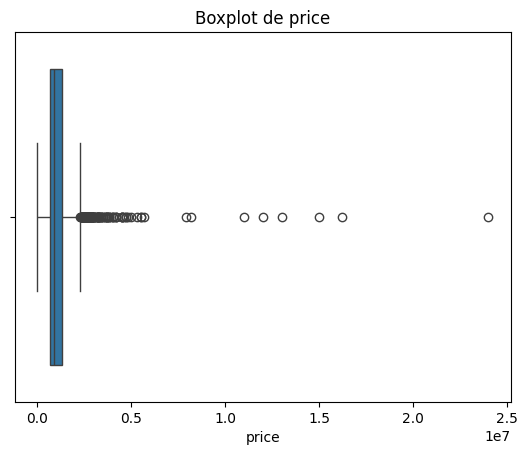

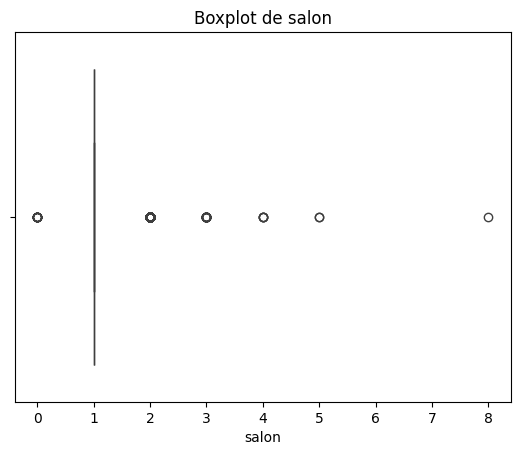

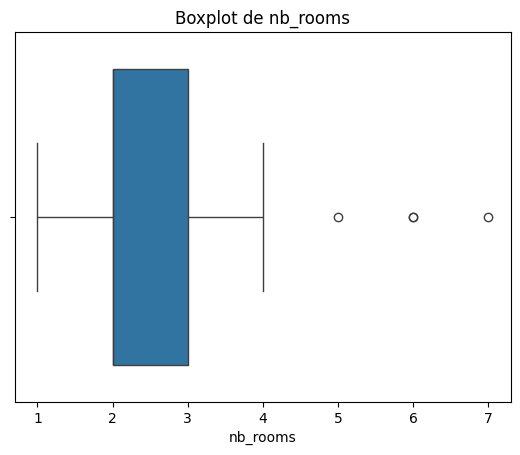

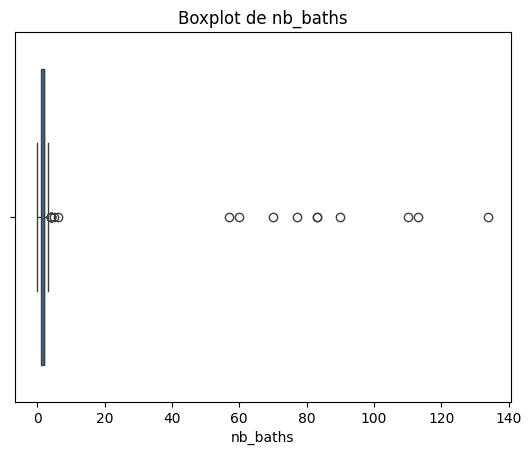

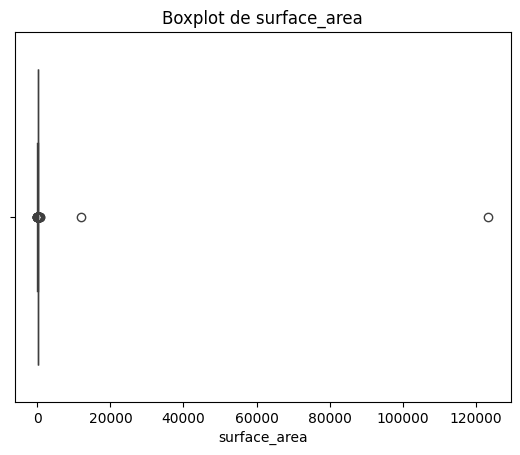

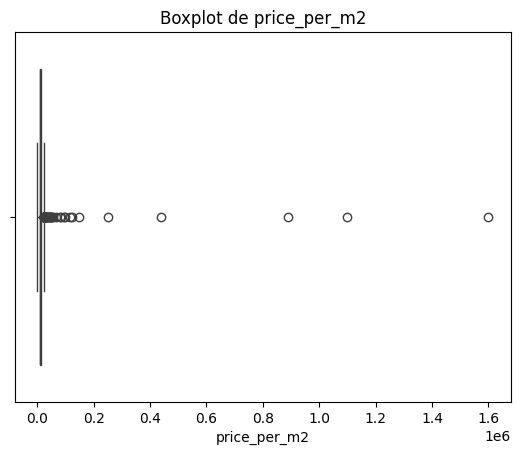

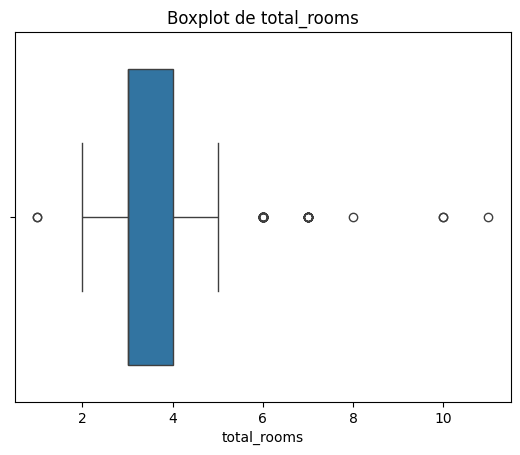

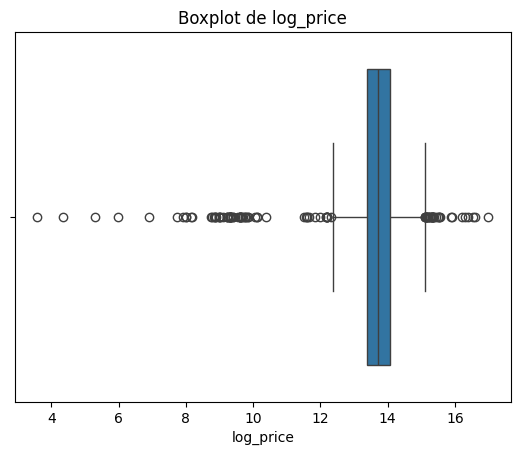

In [1285]:
for i in df.select_dtypes(include='float').columns:
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot de {i}')
    plt.show()

In [1286]:
# Affichage de tous les outliers pour la colonne nb_baths selon IQR
col = 'surface_area'
if col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    print(f"Nombre d'outliers pour {col} : {outliers.shape[0]}")
    print("Valeurs des outliers :")
   # print(outliers.tolist())
    print(df.describe())

Nombre d'outliers pour surface_area : 78
Valeurs des outliers :
              price        salon     nb_rooms     nb_baths   surface_area  \
count  1.732000e+03  1732.000000  1732.000000  1732.000000    1732.000000   
mean   1.132807e+06     1.240185     2.320439     2.219977     175.237298   
std    1.173942e+06     0.535339     0.628220     6.779740    2978.059535   
min    3.500000e+01     0.000000     1.000000     0.000000       1.000000   
25%    6.500000e+05     1.000000     2.000000     1.000000      72.000000   
50%    8.900000e+05     1.000000     2.000000     2.000000      88.000000   
75%    1.300000e+06     1.000000     3.000000     2.000000     114.000000   
max    2.400000e+07     8.000000     7.000000   134.000000  123456.000000   

         Ascenseur       Balcon    Chauffage  Climatisation    Concierge  \
count  1732.000000  1732.000000  1732.000000    1732.000000  1732.000000   
mean      0.524827     0.569284     0.180139       0.303695     0.409931   
std       0.49

In [1287]:
# # Capping des outliers pour toutes les colonnes float selon bornes IQR
# cols=df.select_dtypes(include='float64').columns
# for col in cols:
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     iqr = q3 - q1
#     lower = q1 - 1.5 * iqr
#     upper = q3 + 1.5 * iqr
#     df[col] = df[col].clip(lower, upper)
#     print(f"Outliers capés pour {col} : bornes [{lower:.2f}, {upper:.2f}]")


In [1288]:
outlier_report = {}

# Traitement price par ville avec capping IQR
if 'city_name' in df.columns and 'price' in df.columns:
    for city in df['city_name'].unique():
        mask = df['city_name'] == city
        q1 = df.loc[mask, 'price'].quantile(0.25)
        q3 = df.loc[mask, 'price'].quantile(0.75)
        iqr = q3 - q1
        lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
        df.loc[mask, 'price'] = df.loc[mask, 'price'].clip(lower, upper)
        outlier_report[city] = [round(lower, 0), round(upper, 0)]

# Capping surface_area
if 'surface_area' in df.columns:
    df['surface_area'] = df['surface_area'].clip(40, 300)
    outlier_report['surface_area'] = [40, 300]

# Capping nb_baths
if 'nb_baths' in df.columns:
    df['nb_baths'] = np.minimum(df['nb_baths'], 4)
    outlier_report['nb_baths'] = ['max 4']

# Capping nb_rooms (optionnel)
if 'nb_rooms' in df.columns:
    df['nb_rooms'] = np.minimum(df['nb_rooms'], 5)
    outlier_report['nb_rooms'] = ['max 5']

print("Résumé du traitement des outliers :")
for key, val in outlier_report.items():
    print(f"{key}: {val}")


Résumé du traitement des outliers :
Casablanca: [np.float64(-418750.0), np.float64(2731250.0)]
Dar Bouazza: [np.float64(-762500.0), np.float64(2897500.0)]
Rabat: [np.float64(-1176250.0), np.float64(4333750.0)]
Marrakech: [np.float64(-295000.0), np.float64(2225000.0)]
Asilah: [np.float64(552500.0), np.float64(1092500.0)]
Bouskoura: [np.float64(400825.0), np.float64(1351825.0)]
Kénitra: [np.float64(121250.0), np.float64(1351250.0)]
Mohammedia: [np.float64(210000.0), np.float64(1570000.0)]
Agadir: [np.float64(406250.0), np.float64(1376250.0)]
Tamesna: [np.float64(-40000.0), np.float64(1400000.0)]
Salé: [np.float64(150000.0), np.float64(1350000.0)]
Had Soualem: [np.float64(385000.0), np.float64(825000.0)]
Temara: [np.float64(25000.0), np.float64(2225000.0)]
Benslimane: [np.float64(1099999.0), np.float64(1099999.0)]
Tanger: [np.float64(-200000.0), np.float64(2120000.0)]
Bouznika: [np.float64(202500.0), np.float64(1182500.0)]
Meknès: [np.float64(-422500.0), np.float64(1677500.0)]
Fès: [np.fl

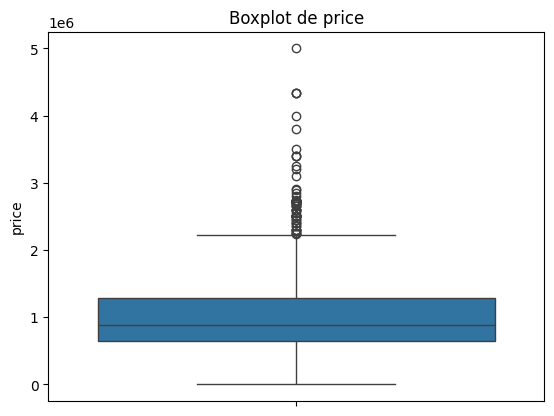

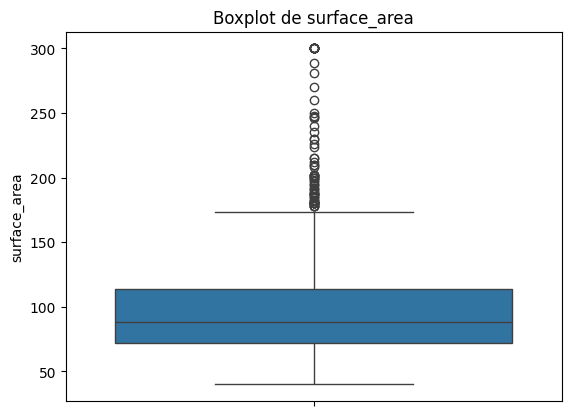

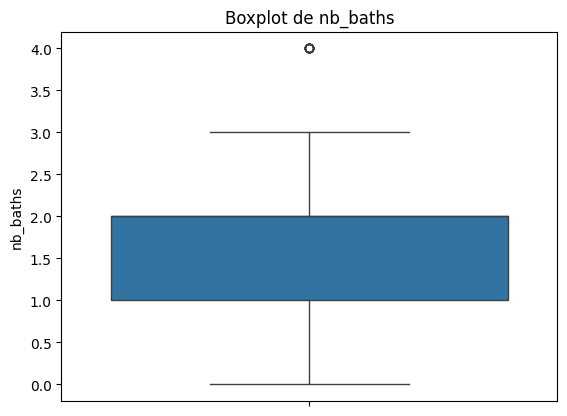

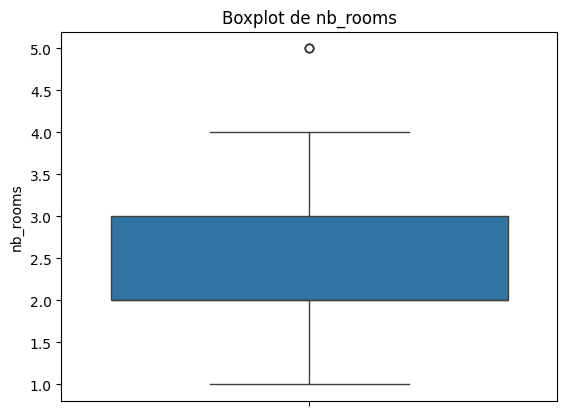

In [1289]:
for i in ['price', 'surface_area', 'nb_baths', 'nb_rooms']:
        sns.boxplot(df[i])
        plt.title(f'Boxplot de {i}')
        plt.show()

In [1290]:

# Encodage de la colonne city_name avec LabelEncoder
from sklearn.preprocessing import LabelEncoder
if 'city_name' in df.columns:
    le = LabelEncoder()
    df['city_name_encoded'] = le.fit_transform(df['city_name'])
    print("Colonne 'city_name' encodée (LabelEncoder) dans 'city_name_encoded'.")

Colonne 'city_name' encodée (LabelEncoder) dans 'city_name_encoded'.


In [1291]:
# Application de la standardisation (StandardScaler) sur les variables numériques
from sklearn.preprocessing import StandardScaler
numeric_cols = df.select_dtypes(include=['float64']).columns.tolist()
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)
print("Variables numériques standardisées prêtes pour la modélisation.")
df_scaled.head()

Variables numériques standardisées prêtes pour la modélisation.


,price,salon,nb_rooms,nb_baths,surface_area,price_per_m2,total_rooms,log_price
0,1.530767,-0.448789,-0.517037,0.436864,1.825618,-0.037857,-0.611322,0.846445
1,0.256000,-0.448789,-0.517037,0.436864,0.030588,-0.032386,-0.611322,0.363348
2,0.501452,-0.448789,-0.517037,0.436864,-0.405348,0.052258,-0.611322,0.477751
3,-0.211151,-0.448789,-2.142278,-1.211608,-1.046430,0.040994,-1.701754,0.097403
4,3.272684,1.419727,1.108204,0.436864,2.646204,0.030180,1.569542,1.257552


In [1292]:
# Sélection des variables explicatives corrélées au prix et vérification de la redondance


# 1. Calcul de la matrice de corrélation sur les variables numériques
corr_matrix = df.corr(numeric_only=True)

# 2. Sélection des variables numériques corrélées au prix (|corr| > 0.15)
price_corr = corr_matrix['price'].drop('price')
selected_vars = price_corr[price_corr.abs() > 0.15].sort_values(ascending=False)
print('Variables numériques corrélées au prix (|corr| > 0.15) :')
for var, corr_val in selected_vars.items():
    print(f"- {var} : corr = {corr_val:.2f}")

# 3. Vérification de la redondance entre les variables sélectionnées
selected_corr_matrix = corr_matrix.loc[selected_vars.index, selected_vars.index]
print('\nMatrice de corrélation entre les variables sélectionnées :')
print(selected_corr_matrix.round(2))

# 4. Identification des couples fortement corrélés entre eux (|corr| > 0.8)
high_corr = []
for i, var1 in enumerate(selected_vars.index):
    for var2 in selected_vars.index[i+1:]:
        corr_val = selected_corr_matrix.loc[var1, var2]
        if abs(corr_val) > 0.8:
            high_corr.append((var1, var2, corr_val))
if high_corr:
    print('\nAttention : couples de variables fortement corrélées entre elles (|corr| > 0.8) :')
    for var1, var2, corr_val in high_corr:
        print(f"- {var1} & {var2} : corr = {corr_val:.2f}")
else:
    print('\nAucune forte redondance détectée entre les variables sélectionnées.')

Variables numériques corrélées au prix (|corr| > 0.15) :
- log_price : corr = 0.71
- surface_area : corr = 0.56
- nb_baths : corr = 0.37
- total_rooms : corr = 0.36
- nb_rooms : corr = 0.35
- Ascenseur : corr = 0.31
- Parking : corr = 0.24
- salon : corr = 0.21
- Terrasse : corr = 0.21
- Climatisation : corr = 0.19
- Concierge : corr = 0.18
- Chauffage : corr = 0.18
- Balcon : corr = 0.15

Matrice de corrélation entre les variables sélectionnées :
               log_price  surface_area  nb_baths  total_rooms  nb_rooms  \
log_price           1.00          0.31      0.23         0.23      0.21   
surface_area        0.31          1.00      0.50         0.64      0.58   
nb_baths            0.23          0.50      1.00         0.43      0.40   
total_rooms         0.23          0.64      0.43         1.00      0.82   
nb_rooms            0.21          0.58      0.40         0.82      1.00   
Ascenseur           0.19          0.23      0.18         0.09      0.10   
Parking             0.1

In [1293]:
# Séparation des données pour la modélisation
from sklearn.model_selection import train_test_split
features = [var for var in selected_vars.index if var != 'log_price']
# Variable cible
y = df['price']

# Variables explicatives : colonnes sélectionnées précédemment
X = df[features]

# Division des données en ensemble d'entraînement et de test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Taille de X_train : {X_train.shape}")
print(f"Taille de X_test : {X_test.shape}")
print(f"Taille de y_train : {y_train.shape}")
print(f"Taille de y_test : {y_test.shape}")

Taille de X_train : (1385, 12)
Taille de X_test : (347, 12)
Taille de y_train : (1385,)
Taille de y_test : (347,)


In [1294]:
# Entraînement et évaluation de plusieurs modèles de régression avec toutes les métriques
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

models = {
    'Régression Linéaire': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MSE : {mse:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"R² : {r2:.2f}")


=== Régression Linéaire ===
MSE : 294498522210.34
RMSE : 542677.18
MAE : 365360.30
R² : 0.35

=== Random Forest ===
MSE : 324574745179.50
RMSE : 569714.62
MAE : 355078.28
R² : 0.29

=== SVR ===
MSE : 477847091733.19
RMSE : 691264.85
MAE : 424730.29
R² : -0.05

=== Gradient Boosting ===
MSE : 297748734454.22
RMSE : 545663.57
MAE : 342208.62
R² : 0.35


In [1295]:
# Validation croisée pour évaluer la robustesse des modèles
from sklearn.model_selection import cross_val_score
print("Validation croisée (5-fold) - Score R² moyen et écart-type :")
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{name}: R² moyen = {scores.mean():.3f}, écart-type = {scores.std():.3f}")

Validation croisée (5-fold) - Score R² moyen et écart-type :
Régression Linéaire: R² moyen = 0.345, écart-type = 0.050
Random Forest: R² moyen = 0.291, écart-type = 0.034
SVR: R² moyen = -0.060, écart-type = 0.037
Gradient Boosting: R² moyen = 0.353, écart-type = 0.044


In [1296]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

best_params = {}

# Linear Regression (GridSearch rapide car peu d'hyperparamètres)
from sklearn.linear_model import LinearRegression
lr_grid = {'fit_intercept': [True, False]}
from sklearn.model_selection import GridSearchCV
lr_search = GridSearchCV(LinearRegression(), lr_grid, cv=3, scoring='r2')
lr_search.fit(X, y)
best_params['Régression Linéaire'] = lr_search.best_params_
print(f"Régression Linéaire - meilleurs paramètres : {lr_search.best_params_}")

# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_grid = {'n_estimators': [50, 100], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5]}
rf_search = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                              rf_grid,
                              n_iter=6,   # nombre d'itérations aléatoires
                              cv=3,
                              scoring='r2',
                              n_jobs=-1,
                              random_state=42)
rf_search.fit(X, y)
best_params['Random Forest'] = rf_search.best_params_
print(f"Random Forest - meilleurs paramètres : {rf_search.best_params_}")

# SVR
from sklearn.svm import SVR
svr_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svr_search = RandomizedSearchCV(SVR(),
                               svr_grid,
                               n_iter=6,
                               cv=3,
                               scoring='r2',
                               n_jobs=-1,
                               random_state=42)
svr_search.fit(X, y)
best_params['SVR'] = svr_search.best_params_
print(f"SVR - meilleurs paramètres : {svr_search.best_params_}")

# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gb_grid = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
gb_search = RandomizedSearchCV(GradientBoostingRegressor(random_state=42),
                              gb_grid,
                              n_iter=6,
                              cv=3,
                              scoring='r2',
                              n_jobs=-1,
                              random_state=42)
gb_search.fit(X, y)
best_params['Gradient Boosting'] = gb_search.best_params_
print(f"Gradient Boosting - meilleurs paramètres : {gb_search.best_params_}")

print("\nRésumé des meilleurs hyperparamètres pour chaque modèle :")
for name, params in best_params.items():
    print(f"{name}: {params}")


Régression Linéaire - meilleurs paramètres : {'fit_intercept': False}
Random Forest - meilleurs paramètres : {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 5}
SVR - meilleurs paramètres : {'kernel': 'linear', 'gamma': 'auto', 'C': 10}
Gradient Boosting - meilleurs paramètres : {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}

Résumé des meilleurs hyperparamètres pour chaque modèle :
Régression Linéaire: {'fit_intercept': False}
Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 5}
SVR: {'kernel': 'linear', 'gamma': 'auto', 'C': 10}
Gradient Boosting: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}


In [1297]:
# Validation croisée supplémentaire (10-fold, scoring MAE)
from sklearn.model_selection import cross_val_score
print("Validation croisée (10-fold) - MAE moyen et écart-type :")
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
    mae_scores = -scores
    print(f"{name}: MAE moyen = {mae_scores.mean():.2f}, écart-type = {mae_scores.std():.2f}")

Validation croisée (10-fold) - MAE moyen et écart-type :
Régression Linéaire: MAE moyen = 349436.87, écart-type = 19330.80


Random Forest: MAE moyen = 348075.83, écart-type = 23329.38
SVR: MAE moyen = 422704.38, écart-type = 35572.40
Gradient Boosting: MAE moyen = 329723.67, écart-type = 21856.61


In [1298]:
# Sélection et sauvegarde du meilleur modèle
import joblib
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append({'name': name, 'model': model, 'r2': r2, 'rmse': rmse})
best = max(results, key=lambda x: (x['r2'], -x['rmse']))
print(f"Meilleur modèle : {best['name']} | R² = {best['r2']:.3f} | RMSE = {best['rmse']:.2f}")
joblib.dump(best['model'], '../models/model.pkl')
print("Modèle sauvegardé dans 'model.pkl'")

Meilleur modèle : Régression Linéaire | R² = 0.352 | RMSE = 542677.18
Modèle sauvegardé dans 'model.pkl'


In [1299]:
# Comparaison des prix réels et prédits pour chaque modèle
import pandas as pd
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    comparison = pd.DataFrame({'Prix réel': y_test.values, 'Prix prédit': y_pred})
    print(f"\n{name} - Comparaison des prix réels et prédits (échantillon 10 premières lignes):")
    print(comparison.head(10))


Régression Linéaire - Comparaison des prix réels et prédits (échantillon 10 premières lignes):
   Prix réel   Prix prédit
0   890000.0  1.350141e+06
1   405000.0  6.877951e+05
2  1350000.0  1.457206e+06
3  1100000.0  1.169195e+06
4   920000.0  8.837797e+05
5   890000.0  5.800101e+05
6  4333750.0  2.582062e+06
7   710000.0  1.032291e+06
8   600000.0  1.005549e+06
9   780000.0  8.415379e+05

Random Forest - Comparaison des prix réels et prédits (échantillon 10 premières lignes):
   Prix réel   Prix prédit
0   890000.0  1.456642e+06
1   405000.0  5.744417e+05
2  1350000.0  1.467322e+06
3  1100000.0  1.227807e+06
4   920000.0  1.207905e+06
5   890000.0  8.766208e+05
6  4333750.0  1.920222e+06
7   710000.0  1.153502e+06
8   600000.0  3.081150e+05
9   780000.0  7.587900e+05

SVR - Comparaison des prix réels et prédits (échantillon 10 premières lignes):
   Prix réel    Prix prédit
0   890000.0  890051.785686
1   405000.0  889972.686342
2  1350000.0  890078.467022
3  1100000.0  890024.195343


In [1300]:
# Comparaison des scores d'entraînement et de test pour détecter l'overfitting
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("\n--- Comparaison des scores d'entraînement et de test pour chaque modèle ---")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    print(f"\n{name}")
    print(f"R² entraînement : {r2_train:.3f} | R² test : {r2_test:.3f}")
    print(f"RMSE entraînement : {rmse_train:.2f} | RMSE test : {rmse_test:.2f}")
    print(f"MAE entraînement : {mae_train:.2f} | MAE test : {mae_test:.2f}")
    if r2_train - r2_test > 0.15:
        print("⚠️ Possible surapprentissage (overfitting) détecté : l'écart entre R² entraînement et test est important.")


--- Comparaison des scores d'entraînement et de test pour chaque modèle ---

Régression Linéaire
R² entraînement : 0.374 | R² test : 0.352
RMSE entraînement : 490691.76 | RMSE test : 542677.18
MAE entraînement : 341533.27 | MAE test : 365360.30

Random Forest
R² entraînement : 0.875 | R² test : 0.286
RMSE entraînement : 219103.07 | RMSE test : 569714.62
MAE entraînement : 144730.72 | MAE test : 355078.28
⚠️ Possible surapprentissage (overfitting) détecté : l'écart entre R² entraînement et test est important.

SVR
R² entraînement : -0.052 | R² test : -0.051
RMSE entraînement : 636082.22 | RMSE test : 691264.85
MAE entraînement : 422188.35 | MAE test : 424730.29

Gradient Boosting
R² entraînement : 0.556 | R² test : 0.345
RMSE entraînement : 413197.95 | RMSE test : 545663.57
MAE entraînement : 281062.74 | MAE test : 342208.62
⚠️ Possible surapprentissage (overfitting) détecté : l'écart entre R² entraînement et test est important.


In [1301]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Modèle exemple
from sklearn.metrics import r2_score

# Supposons que X, y sont tes features et target

# 1. Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Initialisation du modèle (ici Random Forest)
model = RandomForestRegressor(random_state=42)

# 3. Entraînement
model.fit(X_train, y_train)

# 4. Prédictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 5. Scores R²
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² sur train : {r2_train:.3f}")
print(f"R² sur test  : {r2_test:.3f}")

# 6. Interprétation
if r2_train - r2_test > 0.1:
    print("⚠️ Potentiel overfitting détecté : le modèle performe beaucoup mieux sur le train que sur le test.")
else:
    print("✅ Pas de signe évident d’overfitting, le modèle généralise bien.")


R² sur train : 0.875
R² sur test  : 0.286
⚠️ Potentiel overfitting détecté : le modèle performe beaucoup mieux sur le train que sur le test.
